***
### Import required Libraries

In [1]:
from platform import python_version
print(" Python version used for this analysis is : ", python_version())

 Python version used for this analysis is :  3.9.13


In [2]:
# Data processing
import numpy as np
import pandas as pd

# Visualization 
import seaborn as sns
import matplotlib.pyplot as plt

# Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

# train-test split
from sklearn.model_selection import train_test_split

# for decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# for Autocorrelation Function
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# for PSD
from scipy import signal

# for Auto ARIMA
from pmdarima import auto_arima

# for warning 
import warnings
warnings.filterwarnings("ignore")

# for ARIMA and SARIMAX model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# for model evaluation 
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [3]:
# Load churn dataset into Pandas dataframe 

path = r"C:\Users\Abhishek\Desktop\D213\teleco_time_series .csv"
 
df_telco = pd.read_csv(path)  
df_telco.head()   

,Day,Revenue
0,1,0.000000
1,2,0.000793
2,3,0.825542
3,4,0.320332
4,5,1.082554


### Exploratory Data Analysis (EDA)

In [4]:
#View the shape of the data
df_telco.shape

(731, 2)

In [5]:
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Day      731 non-null    int64  
 1   Revenue  731 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 11.5 KB


In [6]:
df_telco.describe()

,Day,Revenue
count,731.000000,731.000000
mean,366.000000,9.822901
std,211.165812,3.852645
min,1.000000,0.000000
25%,183.500000,6.872836
50%,366.000000,10.785571
75%,548.500000,12.566911
max,731.000000,18.154769


In [7]:
#first 10 rows 
df_telco.head(10)

,Day,Revenue
0,1,0.000000
1,2,0.000793
2,3,0.825542
3,4,0.320332
4,5,1.082554
5,6,0.107654
6,7,0.493901
7,8,0.376698
8,9,0.304075
9,10,0.591748


In [8]:
# check for null 
print("Check for Nulls")
print("-"*100)
print(df_telco.isnull().any())

Check for Nulls
----------------------------------------------------------------------------------------------------
Day        False
Revenue    False
dtype: bool


**Result :** No Null value present

In [9]:
# check for missing values
print("Check for Missing Values")
print("-"*100)
print(df_telco.isna().any())

Check for Missing Values
----------------------------------------------------------------------------------------------------
Day        False
Revenue    False
dtype: bool


**Result :** No Missing value present

### Convert 'Day' to Date for time series

Convert the Day to date and delete the origional Day column and set index. 

In [10]:
# Specify the start date
start_date = pd.to_datetime('2020-01-01')

# Convert 'Days' to dates and store them in 'Date' column
df_telco['Date'] = start_date + pd.to_timedelta(df_telco['Day'] - 1, unit='D')

# Print the updated DataFrame
print(df_telco)

     Day    Revenue       Date
0      1   0.000000 2020-01-01
1      2   0.000793 2020-01-02
2      3   0.825542 2020-01-03
3      4   0.320332 2020-01-04
4      5   1.082554 2020-01-05
..   ...        ...        ...
726  727  16.931559 2021-12-27
727  728  17.490666 2021-12-28
728  729  16.803638 2021-12-29
729  730  16.194813 2021-12-30
730  731  16.620798 2021-12-31

[731 rows x 3 columns]


In [11]:
df_telco.dtypes

Day                 int64
Revenue           float64
Date       datetime64[ns]
dtype: object

In [12]:
df_telco.shape

(731, 3)

In [13]:
# Remove the original 'Days' column
df_telco.drop('Day', axis=1, inplace=True)

# Set 'Day' as the index
df_telco.set_index('Date', inplace=True)

# Print the updated DataFrame
print(df_telco)

              Revenue
Date                 
2020-01-01   0.000000
2020-01-02   0.000793
2020-01-03   0.825542
2020-01-04   0.320332
2020-01-05   1.082554
...               ...
2021-12-27  16.931559
2021-12-28  17.490666
2021-12-29  16.803638
2021-12-30  16.194813
2021-12-31  16.620798

[731 rows x 1 columns]


### Train/Test split 

Train/Test split based on 80% of training and rest 20% of the data will be allocated for testing. 

Shuffle parameter is set to False to ensure that the splitting is done based on the temporal order of the observations.

In [14]:
# Perform test and train split
train_data, test_data = train_test_split(df_telco, test_size=0.2, shuffle=False)

# Print the split datasets
print("Training Data:")
print(train_data)
print("\nTesting Data:")
print(test_data)

Training Data:
              Revenue
Date                 
2020-01-01   0.000000
2020-01-02   0.000793
2020-01-03   0.825542
2020-01-04   0.320332
2020-01-05   1.082554
...               ...
2021-08-02  13.938920
2021-08-03  14.052184
2021-08-04  13.520478
2021-08-05  13.082643
2021-08-06  13.504886

[584 rows x 1 columns]

Testing Data:
              Revenue
Date                 
2021-08-07  13.684826
2021-08-08  13.152903
2021-08-09  13.310290
2021-08-10  12.665601
2021-08-11  13.660658
...               ...
2021-12-27  16.931559
2021-12-28  17.490666
2021-12-29  16.803638
2021-12-30  16.194813
2021-12-31  16.620798

[147 rows x 1 columns]


### Cleaned Dataset  

In [15]:
# Extract the df_telco data in CSV format 
df_telco.to_csv('telco_clean.csv')

# Extract the training data in CSV format 
train_data.to_csv('train_data_clean.csv')

# Extract the testing data in CSV format 
test_data.to_csv('test_data_clean.csv')

### Visualize the data

In [16]:
# Calculate trend line using numpy.polyfit
time_points = np.arange(len(df_telco.index))
trend_line = np.polyfit(time_points, df_telco['Revenue'], 1)
trend_values = np.polyval(trend_line, time_points)

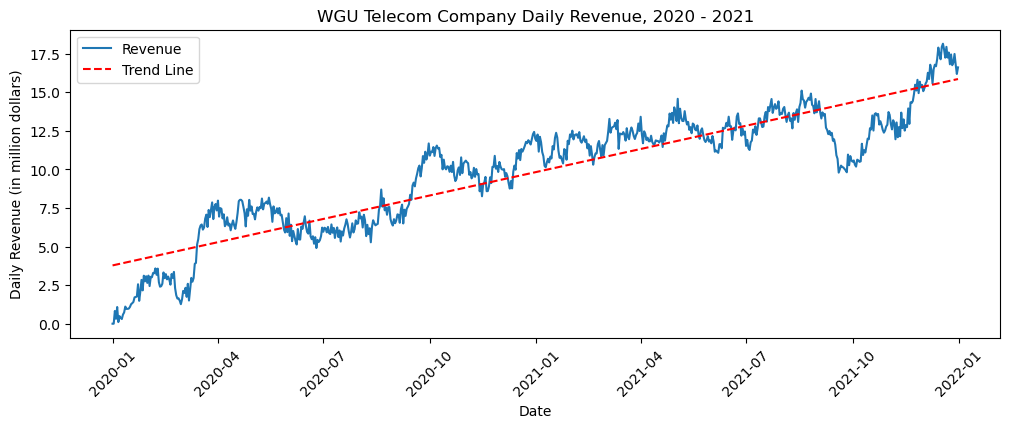

In [17]:
# Create the line graph
plt.figure(figsize=(12, 4))
plt.plot(df_telco.index, df_telco['Revenue'], label='Revenue')
plt.plot(df_telco.index, trend_values, linestyle='--', color='red', label='Trend Line')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Daily Revenue (in million dollars)')
plt.title('WGU Telecom Company Daily Revenue, 2020 - 2021')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# # Display the plot with the trend line
plt.legend()
plt.show()


**The upward trend dotted line(red color) suggests that the revenue for the given period is growing or getting higher as time progresses.** 

### Check for Stationarity

I am using Augmented Dickey-Fuller (ADF) Test.

**H0: It is non stationary**

**H1: It is stationary**


In [18]:
# Define function for ADF test
def adfuller_test(series):
    result=adfuller(series)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(H0), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [19]:
adfuller_test(df_telco['Revenue'])

ADF Test Statistic : -1.924612157310184
p-value : 0.3205728150793963
#Lags Used : 1
Number of Observations Used : 729
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


##### Result : 
**Above results indicates that this data is non-stationary so I need to make it stationary.**

Below performing the first-order differencing using periods=1. 

In [20]:
df_telco['Revenue'].diff(periods=1)

Date
2020-01-01         NaN
2020-01-02    0.000793
2020-01-03    0.824749
2020-01-04   -0.505210
2020-01-05    0.762222
                ...   
2021-12-27    0.170280
2021-12-28    0.559108
2021-12-29   -0.687028
2021-12-30   -0.608824
2021-12-31    0.425985
Name: Revenue, Length: 731, dtype: float64

In [21]:
# Make the data stationary

df_telco_stationary = df_telco.diff(periods=1).dropna()            # drop the 1st row with missing values using dropna 
df_telco_stationary

,Revenue
Date,
2020-01-02,0.000793
2020-01-03,0.824749
2020-01-04,-0.505210
2020-01-05,0.762222
2020-01-06,-0.974900
...,...
2021-12-27,0.170280
2021-12-28,0.559108
2021-12-29,-0.687028


In [22]:
#test for stationary again
adfuller_test(df_telco_stationary['Revenue'])

ADF Test Statistic : -44.87452719387599
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 729
strong evidence against the null hypothesis(H0), reject the null hypothesis. Data has no unit root and is stationary


##### Results : As the p-value is less than the threshold (0.05) so this data is now stationary. 

So this provide d = 1

<AxesSubplot:xlabel='Date'>

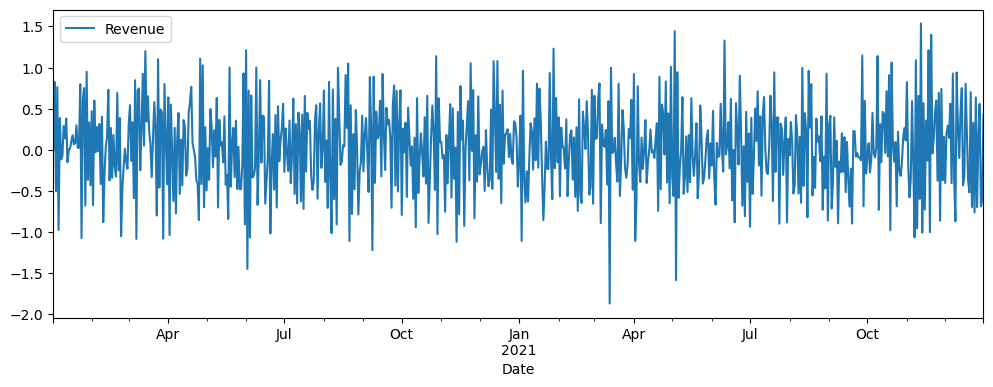

In [23]:
# Plot to verify the stationary
df_telco_stationary.plot(figsize=(12, 4))

In [24]:
# Extract the df_telco_stationary data in CSV format 
df_telco_stationary.to_csv('telco_clean_stationary.csv')

### Decompose a time series data


In [25]:
# Perform seasonal decomposition
result = seasonal_decompose(df_telco_stationary['Revenue'], model='additive')

result

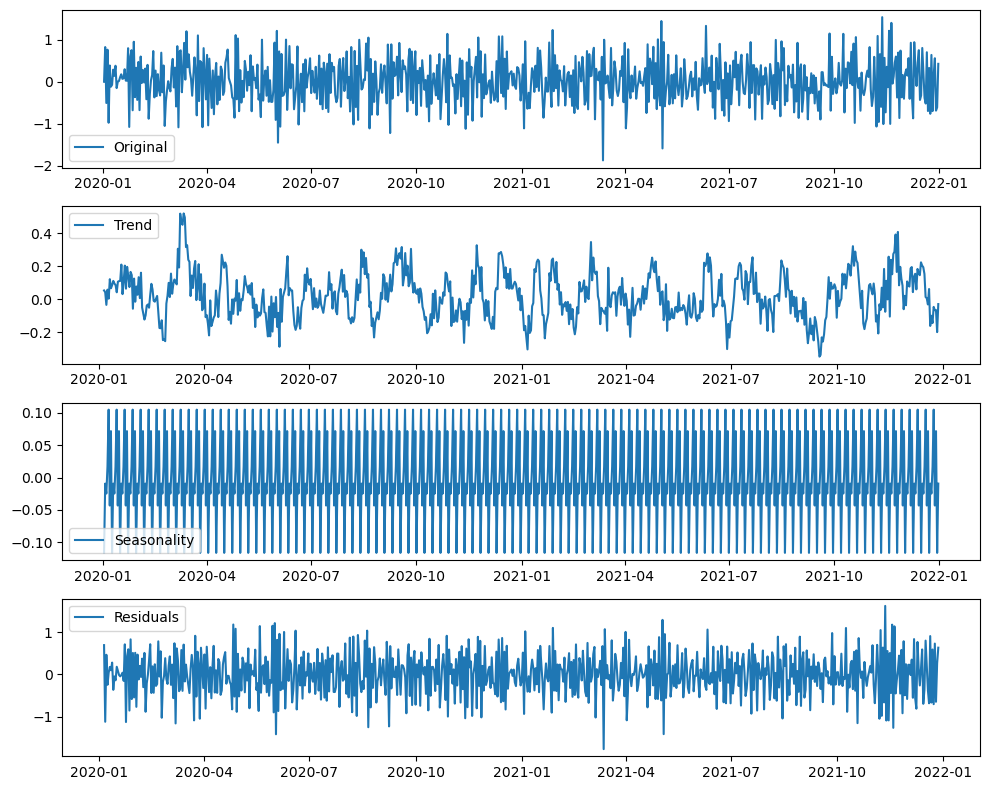

In [26]:
# Plot the decomposition components
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(df_telco_stationary['Revenue'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### Seasonality

Text(0.5, 1.0, 'Seasonal Component, Jan, 2021 - June 2021')

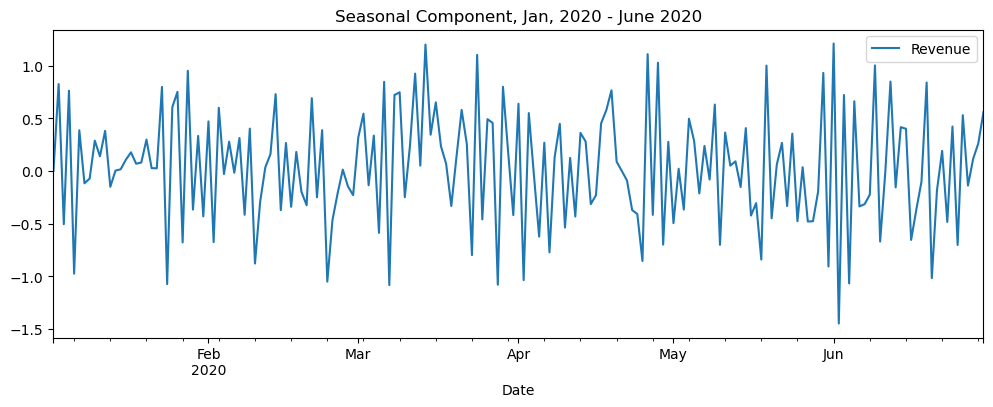

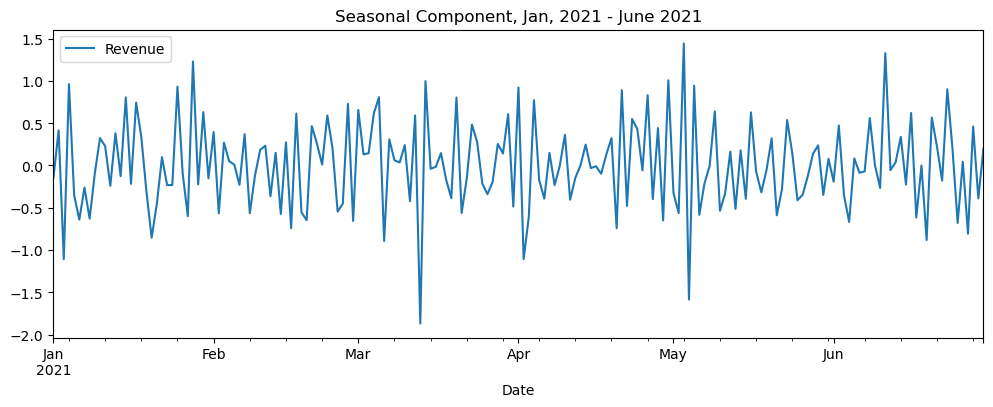

In [27]:
# view subset of data for seasionality 

df_telco_stationary.loc['2020-01-02' :'2020-06-30'].plot(figsize=(12,4))

# Plot the seasonal component, 
plt.title('Seasonal Component, Jan, 2020 - June 2020')

df_telco_stationary.loc['2021-01-01' :'2021-06-30'].plot(figsize=(12,4))
# Plot the seasonal component, 
plt.title('Seasonal Component, Jan, 2021 - June 2021')

**Results :** I do not see any specific pattern for seasionality in the data. 

### Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) 

<Figure size 1200x400 with 0 Axes>

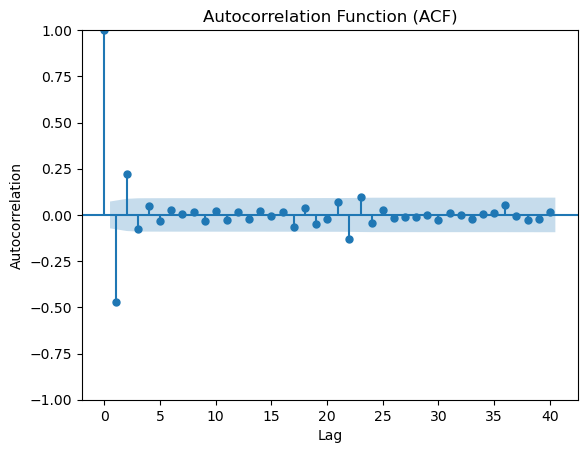

<Figure size 1200x400 with 0 Axes>

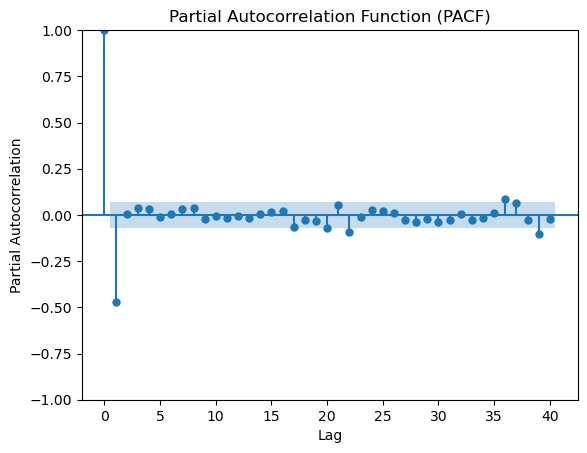

In [28]:
# Plot ACF
plt.figure(figsize=(12, 4))
plot_acf(df_telco_stationary['Revenue'], lags=40, alpha=0.05)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 4))
plot_pacf(df_telco_stationary['Revenue'], lags=40, alpha=0.05)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


- PACF provides q = 1 
- ACF provides p = 1 or 2

### Spectral density

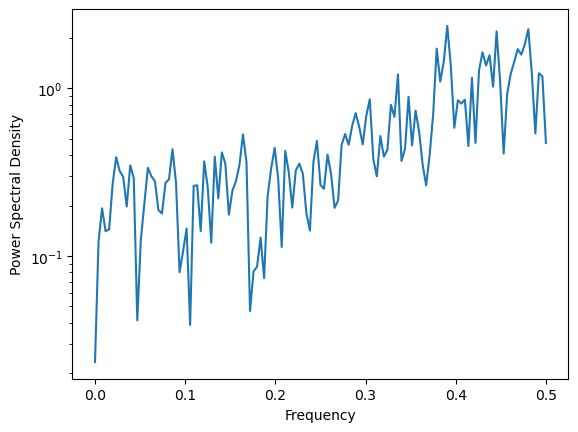

In [29]:
# Plot Power Spectral Density
f, Pxx_den = signal.welch(df_telco_stationary['Revenue'])
plt.semilogy(f, Pxx_den)
plt.xlabel('Frequency')
plt.ylabel('Power Spectral Density')
plt.show()

**The power spectrum density increases as frequency increases.**

### Run Auto ARIMA

In [30]:
# Auto ARIMA on training data 
stepwise_fit = auto_arima(train_data, trace=True, suppress_warning=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=776.988, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=910.148, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=773.046, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=798.905, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=909.276, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=775.043, Time=0.22 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=775.043, Time=0.26 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=776.811, Time=0.50 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=774.035, Time=0.05 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 1.995 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  584
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -383.523
Date:                Wed, 31 May 2023   AIC                            773.046
Time:                        07:24:27   BIC                            786.151
Sample:                    01-01-2020   HQIC                           778.154
                         - 08-06-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0335      0.019      1.720      0.085      -0.005       0.072
ar.L1         -0.4605      0.036    -12.663      0.000      -0.532      -0.389
sigma2         0.2181      0.014     16.020      0.000       0.191       0.245
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.79
Prob(Q):                              0.96   Prob(JB):                         0.41
Heteroskedasticity (H):               0.97   Skew:                            -0.07
Prob(H) (two-sided):                  0.85   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Result : Best model found is - ARIMA(1,1,0)**

### Create the ARIMA Model using different p, d , q values 

### Model 1 using p,d,q = (1,1,1)

In [31]:
# Create ARIMA model
#arima_model1 = ARIMA(train_data, order=(1, 1, 1))  # Specify the order as (p, d, q)

model1 = SARIMAX(train_data, order=(1,1,1), trend = 'c')
# Fit the model
result1 =model1.fit()

# Print the model summary
print(result1.summary())

                               SARIMAX Results                                
Dep. Variable:                Revenue   No. Observations:                  584
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -383.522
Date:                Wed, 31 May 2023   AIC                            775.043
Time:                        07:24:27   BIC                            792.516
Sample:                    01-01-2020   HQIC                           781.854
                         - 08-06-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0334      0.019      1.718      0.086      -0.005       0.072
ar.L1         -0.4570      0.078     -5.895      0.000      -0.609      -0.305
ma.L1         -0.0045      0.086     -0.052      0.9

### Model 2 using p,d,q = (1,1,0)

In [32]:
# Create ARIMA model
#arima_model2 = SARIMAX(train_data, order=(1, 1, 0))  # Specify the order as (p, d, q)
model2 = SARIMAX(train_data, order=(1,1,0), trend = 'c')
# Fit the model
result2 = model2.fit()

# Print the model summary
print(result2.summary())

                               SARIMAX Results                                
Dep. Variable:                Revenue   No. Observations:                  584
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -383.523
Date:                Wed, 31 May 2023   AIC                            773.046
Time:                        07:24:28   BIC                            786.151
Sample:                    01-01-2020   HQIC                           778.154
                         - 08-06-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0335      0.019      1.720      0.085      -0.005       0.072
ar.L1         -0.4605      0.036    -12.663      0.000      -0.532      -0.389
sigma2         0.2181      0.014     16.020      0.0

### Model 3 using p,d,q = (1,0,0)

In [33]:
# Create ARIMA model
#arima_model3 = ARIMA(train_data, order=(1, 0, 0))  # Specify the order as (p, d, q)
model3 = SARIMAX(train_data, order=(1,0,0), trend = 'c')
# Fit the model
result3 = model3.fit()

# Print the model summary
print(result3.summary())

                               SARIMAX Results                                
Dep. Variable:                Revenue   No. Observations:                  584
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -455.886
Date:                Wed, 31 May 2023   AIC                            917.772
Time:                        07:24:28   BIC                            930.882
Sample:                    01-01-2020   HQIC                           922.882
                         - 08-06-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0568      0.035      1.615      0.106      -0.012       0.126
ar.L1          0.9930      0.005    203.198      0.000       0.983       1.003
sigma2         0.2769      0.017     16.056      0.0

### Model 4 using p,d,q = (1,0,1)

In [34]:
# Create ARIMA model
#arima_model4 = ARIMA(train_data, order=(1, 0, 1))  # Specify the order as (p, d, q)
model4 = SARIMAX(train_data, order=(1,0,1), trend = 'c')
# Fit the model
result4 = model4.fit()

# Print the model summary
print(result4.summary())

                               SARIMAX Results                                
Dep. Variable:                Revenue   No. Observations:                  584
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -401.275
Date:                Wed, 31 May 2023   AIC                            810.550
Time:                        07:24:29   BIC                            828.029
Sample:                    01-01-2020   HQIC                           817.362
                         - 08-06-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0103      0.019      0.547      0.584      -0.026       0.047
ar.L1          0.9986      0.003    353.907      0.000       0.993       1.004
ma.L1         -0.3829      0.036    -10.512      0.0

#### Result : 

After comparing the output and found that the best ARIMA model is Model 2 using **p,d,q = (1,1,0)**. This is the same value I received from the auto arima model as well. 


### Model Evaluation 

Model evaluation is done for the model2 which is best model among all the above run. 

In [55]:
# Caclulate the residuals 
residuals = result2.resid
residuals

Date
2020-01-01   -0.022957
2020-01-02   -0.022164
2020-01-03    0.791585
2020-01-04   -0.158935
2020-01-05    0.496040
                ...   
2021-08-02    0.273374
2021-08-03    0.235404
2021-08-04   -0.513075
2021-08-05   -0.716219
2021-08-06    0.187087
Length: 584, dtype: float64

In [36]:
# Calculate the mean absolute error from residuals  
mae = np.mean(np.abs(result2.resid))

# Print mean absolute error 
print("The mean absolute error is :", round (mae,2))

The mean absolute error is : 0.38


**Result :**
The mean absolute error is reported as 0.38, which means that, on average, the model's predictions deviate from the actual values by approximately 0.38 units.

### Calculate the RMSE

In [56]:
# Calculate the squared residuals
squared_residuals = residuals**2

# Calculate the mean of squared residuals
mean_squared_residuals = np.mean(squared_residuals)

# Calculate the RMSE
rmse = np.sqrt(mean_squared_residuals)

In [57]:
rmse

0.46666055157908537

**Result:** 

RMSE score of 0.466 suggests that, on average, the predictions of the model deviate from the actual values by 0.466 units.

### Validate the model using Test Data 

In [37]:
test_data

,Revenue
Date,
2021-08-07,13.684826
2021-08-08,13.152903
2021-08-09,13.310290
2021-08-10,12.665601
2021-08-11,13.660658
...,...
2021-12-27,16.931559
2021-12-28,17.490666
2021-12-29,16.803638


In [38]:
len(test_data)

147

In [39]:
# Generate the forecast for test data
forecast = result2.get_forecast(steps=len(test_data))

In [40]:
forecast

In [41]:
forecast.conf_int()

,lower Revenue,upper Revenue
2021-08-07,12.428559,14.259378
2021-08-08,12.411472,14.491730
2021-08-09,12.188491,14.682638
2021-08-10,12.093186,14.859771
2021-08-11,11.967098,15.015235
...,...,...
2021-12-27,9.143175,24.180533
2021-12-28,9.140053,24.229569
2021-12-29,9.137020,24.278516
2021-12-30,9.134077,24.327374


In [42]:
forecast.predicted_mean

2021-08-07    13.343969
2021-08-08    13.451601
2021-08-09    13.435565
2021-08-10    13.476479
2021-08-11    13.491166
                ...    
2021-12-27    16.661854
2021-12-28    16.684811
2021-12-29    16.707768
2021-12-30    16.730725
2021-12-31    16.753682
Freq: D, Name: predicted_mean, Length: 147, dtype: float64

In [43]:
mean_forecast = forecast.predicted_mean
confidence_intervals = forecast.conf_int()
lower_limits = confidence_intervals.loc[:,'lower Revenue']
upper_limits = confidence_intervals.loc[:,'upper Revenue']

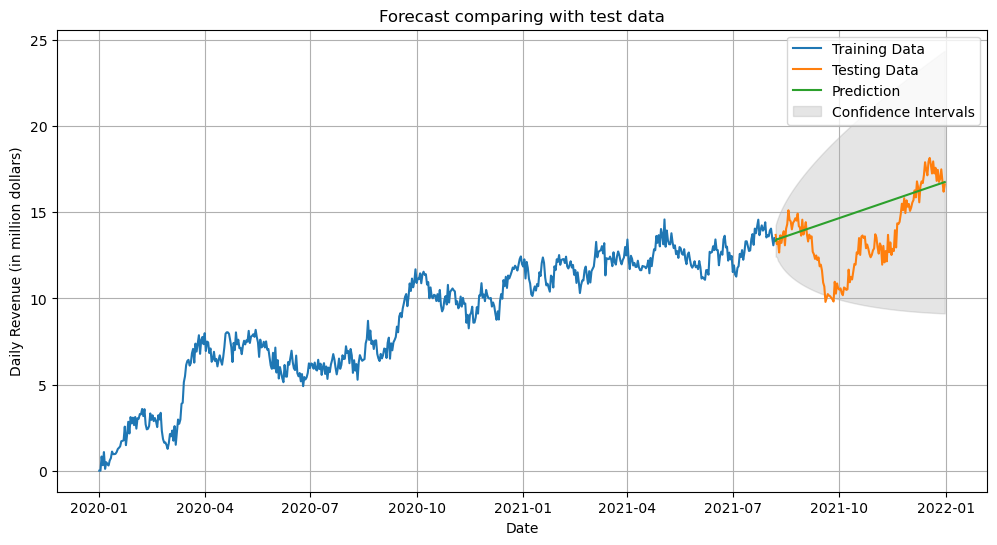

In [44]:
# create the plot of forecasting with test data

plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Testing Data')
plt.plot(mean_forecast.index, mean_forecast, label='Prediction')
plt.fill_between(mean_forecast.index, lower_limits, upper_limits, color='gray', alpha=0.2, label='Confidence Intervals')

plt.xlabel('Date')
plt.ylabel('Daily Revenue (in million dollars)')
plt.title('Forecast comparing with test data')
plt.legend()
plt.grid(True)

plt.show()

**This model continues to show the upward trend for the forecasted value as well with low mean absolute error.**

### Diagnostic Plot

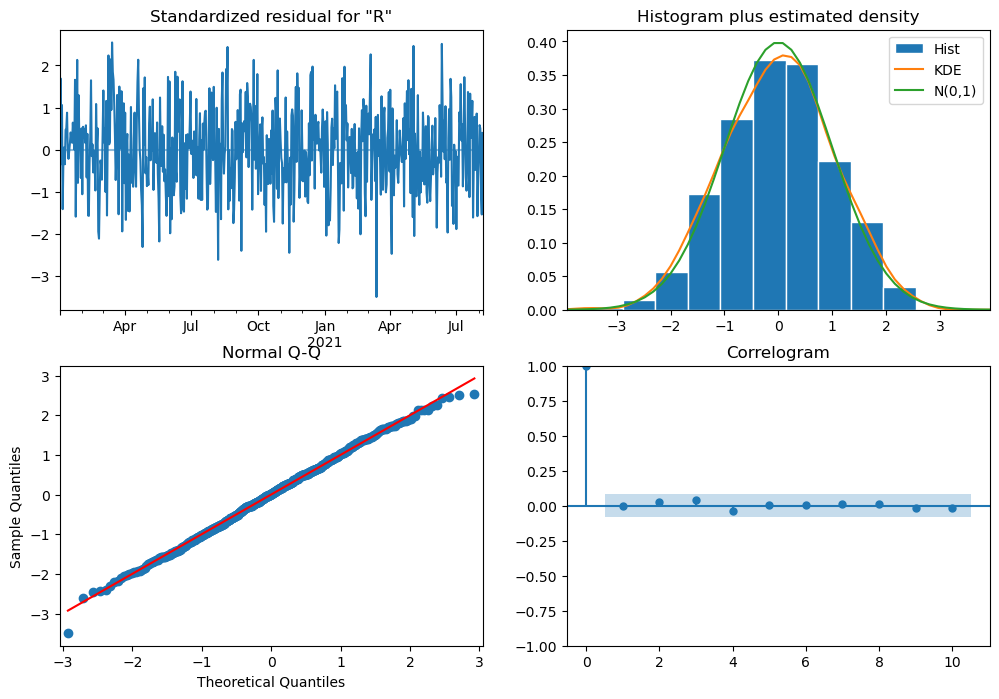

In [45]:
## Generate the diagnostic plot
result2.plot_diagnostics(figsize=(12,8))
plt.show()

**Results :**
    
    
- The standardized residuals show randomness and have a mean of zero with constant variance.
- The histogram and estimated density closely align, indicating normality of the residuals.
- The points on the normal Q-Q plot fall approximately along a straight line util it reaches to the 3rd quantiles which indicating normality of the residuals.
- The autocorrelation function (ACF) plot does not show significant autocorrelation beyond the confidence interval.


### Forecasting for next 180 days 

To create the forecasting for the future 180 days I am building the model again with the full dataset using the same p,d, and q values and then predicting the revenue for the next 180 days using the get_forecast() function.

In [46]:
# Fit the ARIMA model using the entire dataset

#model = ARIMA(df_telco, order=(1, 1, 0))
model = SARIMAX(df_telco, order=(1,1,1), trend = 'c')
result = model.fit()

In [47]:
# Generate the forecast for the next 180 days
forecast = result.get_forecast(steps=180)

In [48]:
forecast

In [49]:
# Extract the forecasted values, confidence intervals, and the time index
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()
time_index = pd.date_range(start=df_telco.index[-1], periods=180, freq='D')

In [50]:
forecast_values

2022-01-01    16.452183
2022-01-02    16.565943
2022-01-03    16.545099
2022-01-04    16.588419
2022-01-05    16.601153
                ...    
2022-06-25    20.470198
2022-06-26    20.492805
2022-06-27    20.515413
2022-06-28    20.538020
2022-06-29    20.560628
Freq: D, Name: predicted_mean, Length: 180, dtype: float64

In [51]:
confidence_intervals

,lower Revenue,upper Revenue
2022-01-01,15.526249,17.378117
2022-01-02,15.516774,17.615111
2022-01-03,15.284093,17.806106
2022-01-04,15.191402,17.985436
2022-01-05,15.061115,18.141191
...,...,...
2022-06-25,12.051031,28.889365
2022-06-26,12.049876,28.935735
2022-06-27,12.048788,28.982038
2022-06-28,12.047765,29.028275


In [52]:
time_index

DatetimeIndex(['2021-12-31', '2022-01-01', '2022-01-02', '2022-01-03',
               '2022-01-04', '2022-01-05', '2022-01-06', '2022-01-07',
               '2022-01-08', '2022-01-09',
               ...
               '2022-06-19', '2022-06-20', '2022-06-21', '2022-06-22',
               '2022-06-23', '2022-06-24', '2022-06-25', '2022-06-26',
               '2022-06-27', '2022-06-28'],
              dtype='datetime64[ns]', length=180, freq='D')

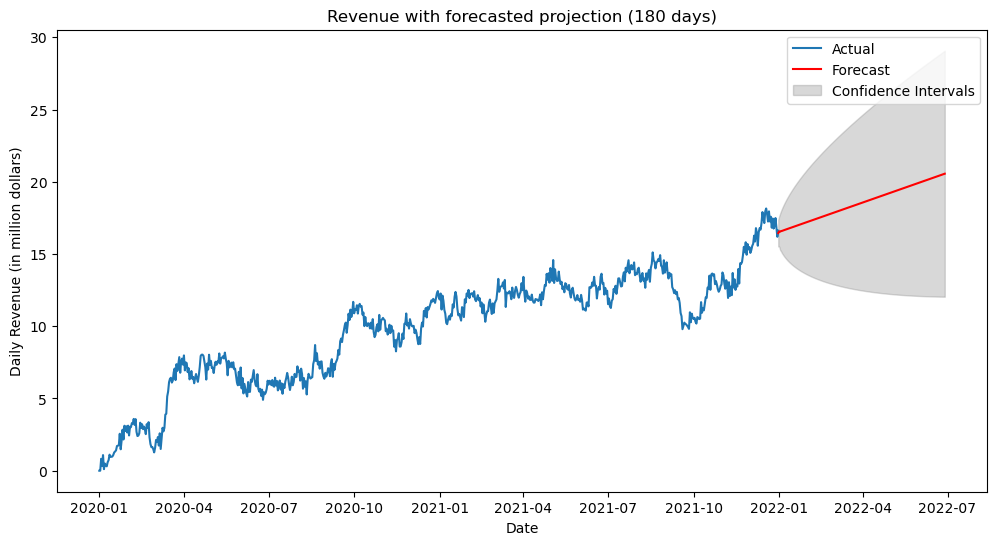

In [53]:
# Plot the forecasted values and the actual values from the test set
plt.figure(figsize=(12, 6))
plt.plot(df_telco.index, df_telco['Revenue'], label='Actual')
plt.plot(time_index, forecast_values, color='red', label='Forecast')
plt.fill_between(time_index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='gray', alpha=0.3, label='Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Daily Revenue (in million dollars)')
plt.title('Revenue with forecasted projection (180 days)')
plt.legend()
plt.show()

**The final annotated visualization for the next 180 days showing an upward trend based on all the previous 2 years of data** 

**References -** 

WGU, R. (n.d.). Advanced Data Analytics - Task 1. Retrieved from https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=efceba6c-e8ef-47a2-b859-aec400fe18e7

WGU, R. (n.d.). Time Series Analysis. Retrieved from https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=551c3203-d37e-4adb-8639-aed60102ce05

Naik, K. (2020, March 19). Forecasting Future Sales Using ARIMA and SARIMAX. 
https://www.youtube.com/watch?v=2XGSIlgUBDI


